###### IMPORTING CUSTOM PACKAGE AFTER INSTALLING WHEEL FILE

In [3]:
from sample_package.folder1.file1 import function1

In [5]:
function1()

Getting function1


###### USING ARGS AND KWARGS

In [ ]:
#https://towardsdatascience.com/10-examples-to-master-args-and-kwargs-in-python-6f1e8cc30749

In [58]:
import pandas as pd
import numpy as np

In [56]:
def show(*args):
    for n in args:
        print(n)

In [57]:
show(1,2,3)

1
2
3


In [59]:
def add(*args):
    print(np.sum(args))

In [60]:
add(1,2,3)

6


In [61]:
d={"a":1,"b":2,"c":3}

In [75]:
def show(**kwargs):
    print(kwargs)

In [77]:
show(**d)

{'a': 1, 'b': 2, 'c': 3}


In [6]:
import seaborn as sns

In [8]:
df = sns.load_dataset("titanic")

In [9]:
df.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [10]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Figure size 1440x576 with 0 Axes>

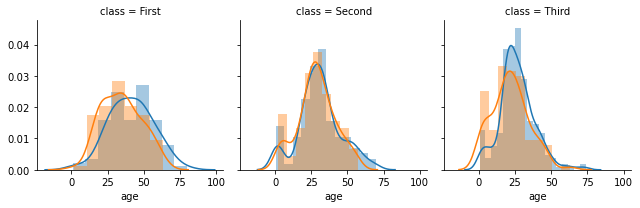

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))
g=sns.FacetGrid(df,col = "class",hue="sex",)
g.map(sns.distplot,"age,");

In [32]:
df.groupby("class")[["age","fare"]].transform(lambda x:x.fillna(x.median()))

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,24.0,23.4500
889,26.0,30.0000


In [14]:
df.groupby("class")["age"].median()

class
First     37.0
Second    29.0
Third     24.0
Name: age, dtype: float64

###### SKLEARN CUSTOM TRANSFORMER

In [41]:
def column_remover(x):
    missing_cols = x.isnull().mean()[df.isnull().mean()>0].index
    x.drop(missing_cols,axis=1,inplace = True)
    return x

In [40]:
from sklearn.preprocessing import FunctionTransformer

In [42]:
custom_trans = FunctionTransformer(column_remover)

In [51]:
y=df["alive"]
x=df.loc[:,~df.columns.isin(["alive"])]

In [49]:
custom_trans.fit_transform(x)

C:\Users\EAMIDSX\Anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alone
0,0,3,male,1,0,7.2500,Third,man,True,False
1,1,1,female,1,0,71.2833,First,woman,False,False
2,1,3,female,0,0,7.9250,Third,woman,False,True
3,1,1,female,1,0,53.1000,First,woman,False,False
4,0,3,male,0,0,8.0500,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,True
887,1,1,female,0,0,30.0000,First,woman,False,True
888,0,3,female,1,2,23.4500,Third,woman,False,False
889,1,1,male,0,0,30.0000,First,man,True,True


In [52]:
x

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True
